# Welcome to Machine Learning

**Definition of Machine Learning**
- The science of getting computers to learn without being explicitly programmed.

**Everyday Applications**
- **Search engines**: Ranking web pages (Google, Bing, Baidu).
- **Facial recognition**: Used in apps like Instagram and Snapchat.
- **Movie recommendations**: Streaming services suggest similar content.
- **Voice assistants**: Voice-to-text and virtual assistants (Siri, Google Assistant).
- **Spam detection**: Filtering suspicious emails.

**Industrial and Business Applications**
- **Renewable energy**: Optimizing wind turbine power for climate change solutions.
- **Healthcare**: Enhancing diagnostics with AI.
- **Manufacturing**: Using computer vision for defect detection in factories (Landing AI).

**Course Overview**
- Hands-on experience implementing machine learning in code.
- Previous versions led to the founding of Coursera.
- Many learners built ML systems and pursued careers in AI.

**Encouragement**
- Excitement about* the journey and getting started.


# Applications of Machine Learning


**Course Overview**  
- Learn state-of-the-art machine learning algorithms.  
- Gain practical experience implementing these algorithms.  
- Understand key practical tips to optimize machine learning models.  
- Explore algorithms used in major AI and tech companies.  

**Why Machine Learning is Widely Used**  
- Machine learning evolved as a sub-field of AI to solve problems that explicit programming couldn't handle (e.g., speech recognition, disease diagnosis, self-driving cars).  
- Traditional programming worked for simple tasks like pathfinding (GPS), but complex problems required learning from data.  
- Machine learning enables applications in industries like healthcare, e-commerce, automotive, and agriculture.  

**Real-World Applications & AI Leadership Experience**  
- Google Brain: Speech recognition, Google Maps, Street View, advertising.  
- Baidu: AI for augmented reality, fraud detection, self-driving cars.  
- Landing AI & AI Fund: AI in factories, healthcare, large-scale agriculture, and e-commerce.  
- Millions of people are applying machine learning in various industries today.  

**Future of AI & AGI**  
- AI is expected to impact almost every industry.  
- Artificial General Intelligence (AGI) is a long-term goal but remains far off (possibly 50-500+ years away).  
- Many researchers believe learning algorithms, possibly inspired by the human brain, are key to progress.  

**Economic Impact & Career Opportunities**  
- McKinsey estimates AI and machine learning could create *$13 trillion in annual value by 2030*.  
- Machine learning has immense untapped potential beyond the software industry (e.g., retail, travel, manufacturing).  
- High demand for ML expertise makes it an excellent time to learn.  

**Next Steps in the Course**  
- Introduction to formal definitions of machine learning.  
- Overview of main ML problem types and algorithms.  
- Understanding key ML terminology and when to use different algorithms.  


# What is Machine Learning

Machine learning is the study that enables computers to learn without being explicitly programmed, a concept attributed to Arthur Samuel. He developed a checkers-playing program in the 1950s that improved its performance by playing tens of thousands of games against itself, learning which positions led to wins or losses. Over time, the program became better at checkers than Samuel himself.

The key takeaway is that the more opportunities a learning algorithm has to train, the better it performs. The course introduces the **two main types of machine learning**:
- **Supervised learning**, which is the most commonly used in real-world applications.
- **Unsupervised learning**, which is covered later alongside recommender systems and reinforcement learning.

Beyond learning algorithms, the course emphasizes **practical advice** on effectively applying machine learning techniques. Even experienced teams sometimes struggle for months due to improper application. This course aims to equip learners not only with the tools but also the knowledge to apply them correctly, reducing the risk of wasted effort.

The next lesson explores **supervised vs. unsupervised learning** in more detail and discusses when to use each approach.

# Supervised Learning: Regression and Classification

Supervised learning maps **input (x) to output (y)** by training on labeled data, where the correct answers (y) are provided. It accounts for **99% of the economic value** created by machine learning today.  

**Types of Supervised Learning**  

1. **Regression:** Predicts a continuous numerical value from infinitely many possibilities.  
2. **Classification:** Predicts a **finite** set of categories rather than continuous numbers.  

**Regression: Predicting Continuous Values**  
Regression is used when the goal is to predict a numerical value. **Example: Housing Price Prediction**  
- Input (**x**): House size  
- Output (**y**): House price  
- The algorithm fits a function (e.g., a straight line or curve) to make predictions for unseen data.  

**Classification: Predicting Categories**  
Classification assigns inputs to **discrete categories** instead of continuous values. **Example: Breast Cancer Detection**  
- Input (**x**): Tumor size, patient age, additional medical features  
- Output (**y**):  
  - **Benign (0)** – Non-cancerous  
  - **Malignant (1)** – Cancerous  
- The algorithm finds a **decision boundary** to classify new inputs correctly.  

**Key Differences: Regression vs. Classification**  
- **Regression:** Predicts from infinitely many possible numbers (e.g., house price estimation).  
- **Classification:** Predicts a **finite** set of categories (e.g., spam vs. not spam, cat vs. dog).  

**Real-World Applications of Supervised Learning**  
- **Spam detection:** Classifying emails as spam or not spam.  
- **Speech recognition:** Converting audio clips into text.  
- **Machine translation:** Translating text from one language to another.  
- **Online advertising:** Predicting the likelihood of a user clicking on an ad.  
- **Self-driving cars:** Identifying objects using sensor and image data.  
- **Manufacturing (Visual inspection):** Detecting product defects from images.  

Supervised learning **trains on labeled examples** and **generalizes to new inputs** to make predictions, making it the dominant form of machine learning in today's economy.  

The next topic explores **unsupervised learning**, which works without labeled data.

# Unsupervised Learning: Clustering and Applications

After supervised learning, **unsupervised learning** is the second most widely used type of machine learning. Unlike supervised learning, which uses labeled data, **unsupervised learning finds patterns or structures in data without predefined labels**.

**Clustering: Identifying Groups in Data**  
A common type of unsupervised learning is **clustering**, where the algorithm groups similar data points into clusters.

**Example: Breast Cancer Data**  
- In **supervised learning**, tumor size and patient age are labeled with benign (0) or malignant (1).  
- In **unsupervised learning**, tumor size and patient age exist **without labels**, and the algorithm must find **patterns or groupings** on its own.  

**Real-World Applications of Clustering**  

**News Article Grouping (Google News)**  
- Clustering groups similar news articles together based on common words and topics.  
- The algorithm finds **topics automatically** without human supervision, helping users discover related stories.  

**Genetic Data Analysis (DNA Microarrays)**  
- Genetic data is visualized as a **matrix of gene activity**, with each column representing a person and each row a gene.  
- Clustering groups individuals with **similar genetic traits**, such as those linked to eye color or dietary preferences.  

**Market Segmentation**  
- Companies use clustering to divide customers into **distinct market segments** based on behavior, preferences, or purchase history.  
- **Example:** DeepLearning.AI identified groups in their community with different motivations, such as:  
  - **Skill development**  
  - **Career growth**  
  - **AI industry updates**  

**Key Difference: Supervised vs. Unsupervised Learning**  
- **Supervised learning** has labeled data and predicts a specific output (e.g., spam vs. not spam).  
- **Unsupervised learning** finds **hidden patterns** in data without predefined labels.  

Clustering is just one type of unsupervised learning. The next topic explores other methods, such as **dimensionality reduction** and **anomaly detection**.


# Unsupervised Learning: Beyond Clustering  


In **unsupervised learning**, the data consists only of **inputs (x)** without corresponding **output labels (y)**. Unlike **supervised learning**, where the algorithm learns from labeled data, unsupervised learning finds **patterns, structures, or relationships** within the data.  

**Types of Unsupervised Learning**  

- **Clustering** groups similar data points together without predefined labels.  
- **Anomaly Detection** identifies **unusual or rare events**, commonly used in **fraud detection** in financial systems.  
- **Dimensionality Reduction** compresses large datasets into a **smaller representation** while retaining as much information as possible.  

**Examples of Unsupervised vs. Supervised Learning**  

- **Spam Filtering (Supervised Learning)**  
  - Emails labeled as **spam** or **not spam** → Supervised learning problem.  

- **News Story Grouping (Unsupervised Learning)**  
  - Clustering similar news articles, as used by **Google News**, is an example of unsupervised learning.  

- **Market Segmentation (Unsupervised Learning)**  
  - Companies analyze customer data to discover **market segments** without predefined categories.  

- **Diabetes Diagnosis (Supervised Learning)**  
  - Similar to the **breast cancer classification** problem, diagnosing diabetes based on labeled patient data is a supervised learning task.  

Even though **clustering** is the most common form of unsupervised learning, **anomaly detection** and **dimensionality reduction** also play important roles in various applications.  

The next topic introduces **Jupyter Notebooks**, an essential tool for working with machine learning models.


# Linear Regression and the Supervised Learning Process  




Linear regression is one of the most widely used supervised learning models. It involves fitting a **straight line** to a dataset to predict numerical values.  

**Example: Predicting House Prices**  
A dataset of **house sizes (x) and prices (y)** is used to train a model. When given a **new house size**, the model predicts its expected price by placing it on the best-fit line.  

**Regression vs. Classification**  
- **Regression** predicts **continuous values** (e.g., house prices).  
- **Classification** predicts **discrete categories** (e.g., cat vs. dog, disease vs. no disease).  

**Training Set and Notation**  
- **Training set**: The dataset used to train the model.  
- **Input feature (x)**: The variable used for prediction (e.g., house size).  
- **Output variable (y)**: The target value (e.g., house price).  
- **Number of training examples (m)**: The total number of data points.  

**Standard Notation in Machine Learning**  
- **(x, y)**: A single training example.  
- **x⁽ⁱ⁾, y⁽ⁱ⁾**: The input and output of the **i-th** training example.  
- **m**: The total number of training examples.  

The next step is feeding this **training set** into a learning algorithm so it can learn from data.  

# Linear Regression and the Function Representation  

Supervised learning algorithms take a **training set** consisting of input features (**x**) and output targets (**y**) to learn a function (**f**) that predicts new values.  

**Model Representation**  
- The function **f(x)** is called the **model** and is used to predict **y-hat (ŷ)**, the estimated value of **y**.  
- In **linear regression**, the function is a straight line:  
  $f(x) = wx + b$  
  where **w** (weight) and **b** (bias) are parameters that determine the best-fit line.  

**Why Use a Linear Function?**  
- A **linear function (straight line)** is simple and effective as a starting point.  
- More complex models, such as **non-linear regression**, can be introduced later when necessary.  

**Univariate Linear Regression**  
- The model uses **one input feature** (**x**) to predict the output (**y**).  
- Also called **"Linear Regression with One Variable"** or **"Univariate Linear Regression."**  

**Next Steps: Cost Function**  
To make the model effective, a **cost function** measures how well the predicted values match actual values. Understanding the cost function is crucial for training machine learning models.  

# Cost Function in Linear Regression  



To implement linear regression, a **cost function** is needed to measure how well the model fits the data. The cost function helps adjust the model parameters (**w** and **b**) to minimize prediction errors.  

**Model Representation**  
- The linear function is represented as:  
  $ f(x) = wx + b $  
- **w (weight)** determines the slope of the line.  
- **b (bias)** determines the y-intercept.  

**Understanding the Cost Function**  
- The goal is to find values for **w** and **b** that make the predicted values **ŷ (y-hat)** as close as possible to the actual values **y** in the training set.  
- The **error** is calculated as **ŷ - y**, which represents the difference between prediction and actual value.  
- The **squared error** is used to avoid negative errors canceling out:  
  $ (\hat{y} - y)^2 $  
- To measure error across all training examples, the sum of squared errors is taken:  
  $ \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 $  

**Final Cost Function (Mean Squared Error with Scaling)**  
- The cost function **J(w, b)** is defined as:  
  $ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)})^2 $  
- The division by **2m** is a convention to simplify later calculations in gradient descent.  

**Purpose of the Cost Function**  
- A **high cost value** means the model's predictions are far from actual values.  
- A **low cost value** indicates a good fit between the model and data.  
- The next step is to **minimize** the cost function by adjusting **w** and **b**, which will be explored further.  


# Understanding the Cost Function in Linear Regression  



The cost function **J(w, b)** helps determine how well a model fits the training data by measuring the error between predicted and actual values. The goal is to **minimize** J by choosing the best parameters **w** (weight) and **b** (bias).  

**Visualizing the Cost Function**  
- Different values of **w** and **b** produce different straight-line models.  
- The cost function **J(w, b)** calculates the **sum of squared errors** to measure how far predictions are from actual values.  
- The best choice for **w** and **b** minimizes **J**, leading to the best fit for the data.  

**Example: Evaluating Different w Values**  
1. **When w = 1**, the model predicts values perfectly, and **J(1) = 0**.  
2. **When w = 0.5**, predictions deviate from actual values, increasing **J(0.5) ≈ 0.58**.  
3. **When w = 0**, the model fails to capture trends, resulting in **J(0) ≈ 2.33**.  
4. **Negative values of w** create worse fits, further increasing the cost.  

**Minimizing J(w, b)**  
- The ideal **w** minimizes **J**, which ensures the best fit to the data.  
- In the general case with both **w** and **b**, the cost function forms a **3D surface**, where the lowest point represents the optimal parameters.  

The next step is visualizing **J(w, b) in 3D**, which provides insight into how different values affect the cost function.


# Visualizing the Cost Function  



The cost function **J(w, b)** helps determine how well a model fits the training data. To better understand its behavior, it can be visualized using **3D surface plots** and **contour plots**.

**3D Surface Plot**  
- When considering both **w (weight)** and **b (bias)**, the cost function forms a **bowl-shaped surface** in 3D space.  
- The lowest point in this "bowl" represents the optimal values of **w** and **b**, minimizing **J(w, b)**.  
- Each point on the surface corresponds to a specific choice of **w** and **b**, with the height indicating the cost value.  

**Contour Plot Representation**  
- A **contour plot** is a 2D projection of the 3D cost function.  
- Each **ellipse (oval shape)** represents a set of points with the **same cost value**.  
- The smallest ellipse at the center corresponds to the **minimum cost**, representing the best-fit parameters.  
- This plot is similar to **topographical maps** used for mountain elevations.  

**Interpreting the Visualizations**  
- **Larger cost values** appear on the outer ellipses, indicating poor parameter choices.  
- **Smaller cost values** appear toward the center, showing better-fitting models.  
- The goal of **linear regression** is to **find the optimal (w, b) that minimizes J(w, b)**, which is at the center of the smallest ellipse.

Contour plots provide a useful 2D visualization of the cost function, helping in optimization techniques. The next step is to see how different **(w, b) values** affect the fitted line in **linear regression**.


# Exploring Different Values of w and b  



Different choices of **w** (weight) and **b** (bias) result in different **straight-line fits** to the data, affecting the cost function **J(w, b)**. The goal is to find the optimal values that minimize **J**.

**Visualizing the Cost Function**  
- Each pair of **w** and **b** corresponds to a specific line **f(x) = wx + b**.  
- Poor choices result in **high cost**, meaning predictions are far from actual values.  
- The **best-fit line** corresponds to a **point near the minimum** of **J(w, b)**.  

**Examples of Different Parameter Choices**  
1. **w = -0.15, b = 800** → The line is a poor fit, resulting in **high cost**.  
2. **w = 0, b = 360** → A flat line, still not optimal but slightly better.  
3. **w ≠ 0, b ≠ 0** → Some lines get closer to the data, reducing cost.  
4. **Best-fit line** → Near the center of the smallest **ellipse in the contour plot**, minimizing error.  

**Optional Lab Features**  
- Interactive contour plots to visualize **how changes in w and b affect the cost**.  
- A **3D surface plot** to explore the bowl-shaped cost function.  
- Code implementation of the cost function to experiment with different values.  

**Next Step: Gradient Descent**  
Instead of manually searching for the best **w** and **b**, **gradient descent** is an algorithm that **automatically minimizes J(w, b)**. This optimization method is widely used in AI and machine learning.


# Exercise Example Coursera


A house with 1000 square feet(sqft) sold for $300,000 and a house with 2000 square feet sold for $500,000. <br> These two points will constitute our data or training set. In this lab, the **units of size are 1000 sqft** and the **units of price are 1000s of dollars**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)

x_train = np.array([1000.0, 2000.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1000. 2000.]
y_train = [300. 500.]


**Number of training examples m**<br><br>
You will use m to denote the number of training examples. Numpy arrays have a .shape parameter. 
- x_train.shape returns a python tuple with an entry for each dimension. 
- x_train.shape[0] is the length of the array and number of examples as shown below.

In [55]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


We can also use the Python len() function as shown below.

In [56]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


**Training example x_i, y_i**<br>

You will use $(x^{(i)}$, $y^{(i)})$ to denote the $i^{th}$ training example. Since Python is zero indexed, $(x^{(0)}$, $y^{(0)})$ is (1.0, 300.0) and $(x^{(1)}$, $y^{(1)})$ is (2.0, 500.0). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [57]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1000.0, 300.0)


**Plotting the data**<br><br>
You can plot these two points using the scatter() function in the matplotlib library, as shown in the cell below.

The function arguments marker and c show the points as red crosses (the default is blue dots).
You can use other functions in the matplotlib library to set the title and labels to displa

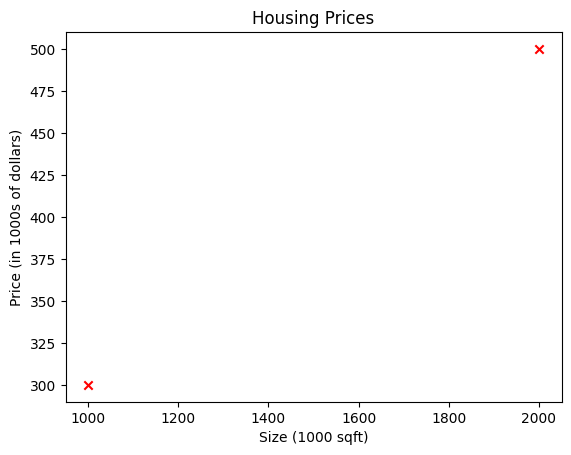

In [58]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

Let's try to get a better intuition for this through the code blocks below. Let's start with  𝑤=100 and  𝑏=100.

In [70]:
from fractions import Fraction
import numpy as np

# 1️⃣ Berechnung der Steigung w (Gewicht)
w = Fraction(y_train[1] - y_train[0], x_train[1] - x_train[0])

# 2️⃣ Berechnung des Bias b mit einem Trainingspunkt (x_train[0], y_train[0])
b = y_train[0] - w * x_train[0]

print(f"w: {w}")  # Erwartet: 1/5 (entspricht 0.2)
print(f"b: {b}")  # Erwartet: 100


w: 1/5
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as:

For $x^{(0)}$:

$f_{wb} = w \cdot x[0] + b$

For $x^{(1)}$:

$f_{wb} = w \cdot x[1] + b$

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a **for loop** as shown in the `compute_model_output` function below.

---

**Note:**
- The argument description **`ndarray (m,)`** describes a **NumPy** n-dimensional array of shape $(m,)$.
- **(scalar)** describes an argument without dimensions, just a magnitude.
- `np.zeros(n)` will return a one-dimensional NumPy array with $n$ entries.


In [71]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Now let's call the compute_model_output function and plot the output..

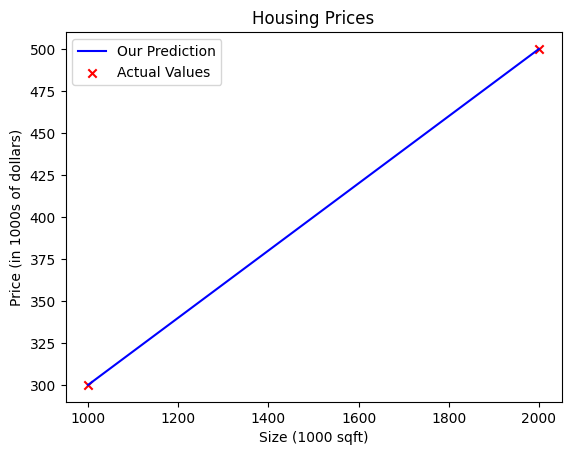

In [72]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

**Prediction**<br><br>
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of  𝑥
  are in 1000's of sqft,  𝑥
  is 1.2.

In [75]:
 
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


**Congratulations!**<br><br>
In this lab you have learned:
 - Linear regression builds a model which establishes a relationship between features and targets
     - In the example above, the feature was house size and the target was house price
     - for simple linear regression, the model has two parameters $w$ and $b$ whose values are 'fit' using *training data*.
     - once a model's parameters have been determined, the model can be used to make predictions on novel data.

### Another example

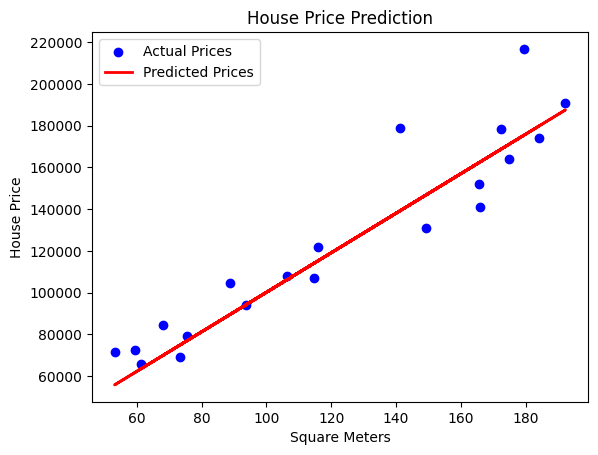

Model Coefficient (slope): 946.49
Model Intercept: 5533.95


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate random square meters (features) between 50 and 200 for 100 houses
X = np.random.uniform(50, 200, 100).reshape(-1, 1)

# Generate house prices with a base price of 1000 per square meter and added noise
# Price formula: price = 1000 * square_meters + noise
noise = np.random.normal(0, 20000, 100)
y = 1000 * X.flatten() + noise

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted prices
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel("Square Meters")
plt.ylabel("House Price")
plt.title("House Price Prediction")
plt.legend()
plt.show()

# Print the model coefficients
print(f"Model Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")


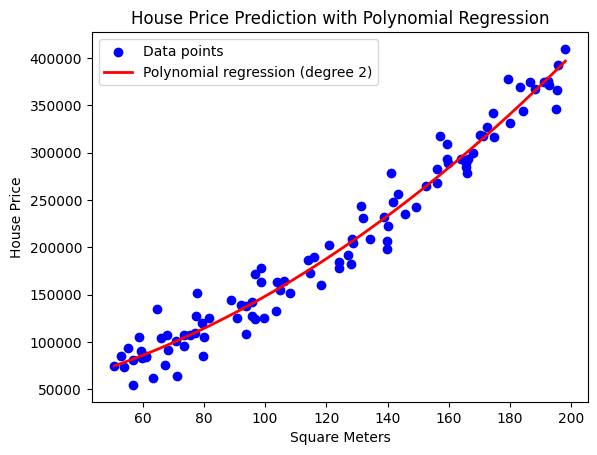

Model coefficients: [  0.         430.43407687   7.06600428]
Model intercept: 34541.33982375995


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Set random seed for reproducibility
np.random.seed(42)

# Generate random square meters between 50 and 200 for 100 houses
X = np.random.uniform(50, 200, 100).reshape(-1, 1)

# Generate house prices using a quadratic relationship plus noise
# For instance: price = 1000 * square_meters + 5 * (square_meters^2) + noise
noise = np.random.normal(0, 20000, 100)
y = 1000 * X.flatten() + 5 * (X.flatten() ** 2) + noise

# Transform the features into polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Create a range of values for smooth curve visualization
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_new_poly = poly.transform(X_new)
y_new = model.predict(X_new_poly)

# Plot the original data and the polynomial regression curve
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_new, color='red', linewidth=2, label='Polynomial regression (degree 2)')
plt.xlabel("Square Meters")
plt.ylabel("House Price")
plt.title("House Price Prediction with Polynomial Regression")
plt.legend()
plt.show()

# Print model coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


## Clasification

**Classification Thematic Explanation**

In **regression**, the goal is to predict a **continuous** value, like a house price or tumor volume. By contrast, in **classification**, the goal is to predict a **category** (or class) from a small set of possible labels. For instance, in a **breast cancer detection** scenario, you may use features such as **tumor size** and **patient age** to classify a tumor as **benign** or **malignant**.

1. **Small Number of Outputs**: Classification tasks have discrete outputs, such as 0 or 1, or multiple classes (e.g., Type 1 vs. Type 2 malignant).
2. **Decision Boundary**: In a two-feature scenario, data can be plotted on a 2D plane. A classifier learns a boundary (or boundaries) that separate different classes (e.g., malignant vs. benign).
3. **Evaluation Metrics**: You measure how well your model generalizes using metrics like **accuracy**, **precision**, **recall**, and **F1-score**.
4. **Model Examples**: Common classification models include **Logistic Regression**, **Support Vector Machines (SVM)**, **Decision Trees**, **Random Forests**, and **Neural Networks**.

---

**Python Code for Classification Example**

Below is a short code example in Python using **Logistic Regression** from `scikit-learn`. We:

1. Generate synthetic data for “Age” and “Tumor Size”.
2. Label points as benign (0) or malignant (1).
3. Train a logistic regression model.
4. Visualize the decision boundary.


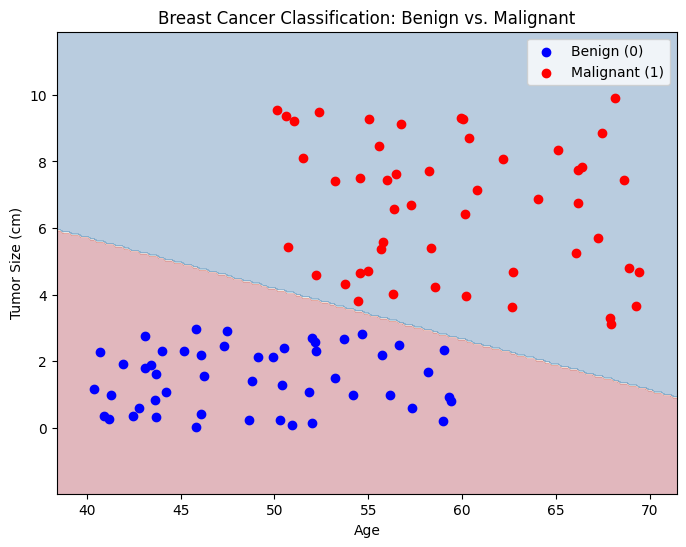

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. Generate synthetic data
# --------------------------
np.random.seed(42)

# Benign tumors (class 0): Age ~ 40-60, Tumor size ~ 0-3 cm
age_benign = 40 + 20 * np.random.rand(50)
size_benign = 3 * np.random.rand(50)

# Malignant tumors (class 1): Age ~ 50-70, Tumor size ~ 3-10 cm
age_malignant = 50 + 20 * np.random.rand(50)
size_malignant = 3 + 7 * np.random.rand(50)

# Combine the data
X_benign = np.column_stack((age_benign, size_benign))
X_malignant = np.column_stack((age_malignant, size_malignant))
X = np.vstack((X_benign, X_malignant))

y_benign = np.zeros(50, dtype=int)
y_malignant = np.ones(50, dtype=int)
y = np.concatenate((y_benign, y_malignant))

# 2. Train the logistic regression model
# --------------------------------------
model = LogisticRegression()
model.fit(X, y)

# 3. Create a grid to plot the decision boundary
# ----------------------------------------------
age_min, age_max = X[:, 0].min() - 2, X[:, 0].max() + 2
size_min, size_max = X[:, 1].min() - 2, X[:, 1].max() + 2

age_range = np.linspace(age_min, age_max, 200)
size_range = np.linspace(size_min, size_max, 200)
age_grid, size_grid = np.meshgrid(age_range, size_range)
grid_points = np.c_[age_grid.ravel(), size_grid.ravel()]

# Predict the class for each point in the grid
Z = model.predict(grid_points)
Z = Z.reshape(age_grid.shape)

# 4. Plot the results
# -------------------
plt.figure(figsize=(8, 6))

# Plot the decision boundary
plt.contourf(age_grid, size_grid, Z, alpha=0.3, cmap='RdBu')

# Plot the training data points
plt.scatter(X_benign[:, 0], X_benign[:, 1], color='blue', label='Benign (0)')
plt.scatter(X_malignant[:, 0], X_malignant[:, 1], color='red', label='Malignant (1)')

plt.xlabel("Age")
plt.ylabel("Tumor Size (cm)")
plt.title("Breast Cancer Classification: Benign vs. Malignant")
plt.legend()
plt.show()


**Explanation of Key Steps**

1. **Data Generation**  
   - We create two clusters of points: one represents benign tumors (smaller size, moderate age), the other represents malignant tumors (larger size, higher age).

2. **Model Training**  
   - We use **logistic regression** to perform binary classification.

3. **Decision Boundary**  
   - A grid of points is created, and each point is classified by the trained model. We then visualize these predictions to show how the model separates benign and malignant data.

4. **Plotting**  
   - We overlay the decision boundary on the original data (blue = benign, red = malignant).

---

**Conclusion**

Classification enables the prediction of discrete outcomes—like benign vs. malignant—based on relevant features (here, **Age** and **Tumor Size**). By training on labeled examples, the model can predict whether new, unseen data indicates a benign or malignant tumor, assisting in more accurate and early diagnosis.


### Key Concepts

- **Clustering Definition:**  
  Partitioning a dataset into groups (clusters) so that data points within the same cluster are more similar to each other than to those in other clusters.

- **Similarity Metrics:**  
  Similarity is commonly measured using distance metrics such as Euclidean or Manhattan distance.

**Common Clustering Algorithms**
- **K-Means Clustering:**  
  Divides the dataset into *k* clusters by minimizing the variance within each cluster through iterative assignment and update steps.

- **Hierarchical Clustering:**  
  Builds a dendrogram to represent data grouping in a tree-like structure, which can be formed using agglomerative (bottom-up) or divisive (top-down) methods.

- **Density-Based Clustering (e.g., DBSCAN):**  
  Forms clusters based on areas of high density, allowing detection of clusters of arbitrary shapes and handling noise effectively.

- **Gaussian Mixture Models (GMM):**  
  Assumes data is generated from a mixture of Gaussian distributions, offering a probabilistic approach to clustering where each data point has a likelihood of belonging to each cluster.

**Evaluating Clustering Quality**

- **Silhouette Score:**  
  Evaluates how similar an object is to its own cluster compared to other clusters.

- **Davies-Bouldin Index:**  
  Lower scores indicate better separation between clusters.

- **Within-Cluster Sum of Squares (WCSS):**  
  Often used with the elbow method to choose the optimal number of clusters.

**Applications**

- Market segmentation, image segmentation, anomaly detection, and document clustering are some of the many areas where clustering is applied.

**Challenges**

- Determining the right number of clusters.
- Handling scalability with large datasets.
- Addressing assumptions about cluster shape (e.g., spherical clusters in K-means).


Cluster Labels: [1 1 1 0 0 0]
Centroids:
 [[10.  2.]
 [ 1.  2.]]


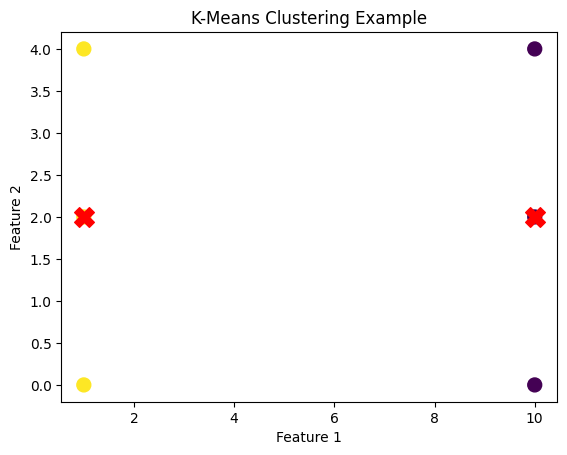

In [6]:
# Python Code for K-Means Clustering Example

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data: two clusters in 2D space
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# Retrieve labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Print cluster labels and centroids
print("Cluster Labels:", labels)
print("Centroids:\n", centroids)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title("K-Means Clustering Example")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Anomaly detection
Find unusual data points (Fraud detection in financial systems)

## Dimensionality reduction
Compress data using fewer numbers (compress big data set while loosing as little information as possible )